In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('solar-radiation.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,mean_relative_humidity,percentage_possible_sunshine,total_sunshine_duration,solar_radiation
0,Jan-10,75.5,-3.4,5.5,75,14,40.4,3.8
1,Feb-10,109.5,-4.9,4.1,74,17,48.8,6.2
2,Mar-10,100.5,-1.4,4.7,68,29,108.0,10.5
3,Apr-10,94.0,3.5,4.3,77,36,146.2,13.9
4,May-10,76.5,7.3,4.9,86,37,168.6,16.5


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9708489941996326


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[ 5.35280286  5.57140509  9.22220056 13.81814913 18.0626869  21.25942707
 10.71711651 16.95188163 14.20032933 10.70267664  4.8005735   4.89894603
  5.85682528  6.07525475 12.00644332 13.07342236 15.92010638 15.05866258
 16.36612213 17.02961904 12.20745156  9.35202662  4.98675639  4.2032955
  4.89911271  5.84257609 11.31549646 17.23681741 15.54113081 21.36203879
 14.64574694 15.42237399 11.36293994  8.1080089   4.30302173  3.87953516
  4.64362112  5.55067005  8.42583517 14.38564287 14.00524656 19.28477445
 21.46126071 12.4654568  11.73364741  9.43103425  4.14897095  3.84467423
  4.43347145  6.27690906 14.10005861 17.73155458 15.38408991 17.69510915
 17.78470182 16.44261895 11.92643876  8.88353596  5.42669923  3.2957652
  4.95002975  6.24240919 11.00921173 14.7332226  17.28073913 14.47411858
 14.30140233 14.3349258  13.60510114  6.67495542  4.98304031  3.67726441
  3.070473    4.40843435 10.83764032 13.57936454 21.32917783 16.95751817
 17.48077583 16.16042294 11.5398

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.7656953623796977
Mean Squared Error: 0.8871464054213593
Root Mean Squared Error: 0.941884496857953


Text(0.5, 1.0, 'Solar radiation - actual and predicted values')

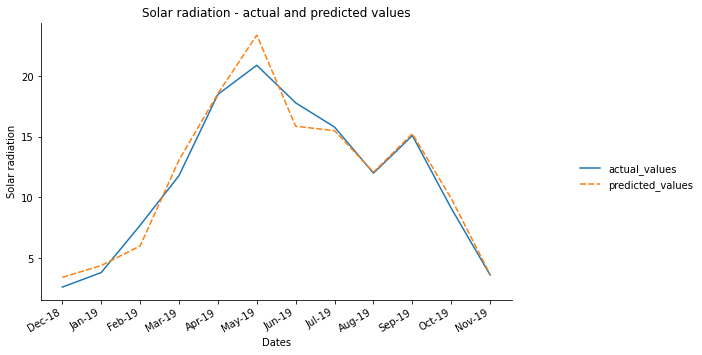

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Solar radiation') #set the label for the y-axis
plt.title('Solar radiation - actual and predicted values') #set the title of the graph